[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer96/sisl/BandsPlot?style=for-the-badge)](https://github.com/pfebrer96/sisl/labels/BandsPlot)

    
    
BandsPlot 
=========

In [1]:
import sisl
import sisl.viz

import sisl._environ
# This is just for convenience to retreive files
siesta_files = sisl._environ.get_environ_variable("SISL_FILES_TESTS") / "sisl" / "io" / "siesta"

Let's get a bands_plot from a `.bands` file

In [2]:
bands_plot = sisl.get_sile( siesta_files / "SrTiO3.bands").plot()

and see what we've got:

In [3]:
bands_plot

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

## Getting the bands that you want

By default, `BandsPlot` gives you **the 15 bands below and above 0 eV** (which is interpreted as the fermi level). 

There are two main ways to specify the bands that you want to display: `Erange` and `bands_range`.

As you may have guessed, `Erange` specifies the energy range that is displayed:

In [4]:
bands_plot.update_settings(Erange=[-10, 10])

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

while with `bands_range` you can actually indicate the indices.

However, note that **`Erange` has preference over `bands_range`**, therefore you need to set `Erange` to `None` if you want the change to take effect.

In [5]:
bands_plot.update_settings(bands_range=[6, 15], Erange=None)

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

If your fermi level is not correctly set or you want a different energy reference, you can provide a value for `E0` to specify where your 0 should be and the bands to display will be automatically calculated from that. 

However, if you want to update `E0` after the plot has been build and you want `BandsPlot` to recalculate the bands for you you will need to set `Erange` and `bands_range` to `None` again.

In [6]:
bands_plot.update_settings(E0=-10, bands_range=None, Erange=None)

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

Notice how only 25 bands are displayed now: the only 10 that are below 0 eV (there are no lower states) and 15 above 0 eV.

In [7]:
# Set them back to "normal"
bands_plot = bands_plot.update_settings(E0=0, bands_range=None, Erange=None)

Notice that in spin polarized bands, **you can select the spins to display using the `spin` setting**, just pass a list of spin components (e.g. `spin=[0]`).

## Quick styling

If all you want is to change the color and width of the bands, there's one simple solution: use the `bands_color` and `bands_width` settings.

Let's show them in red:

In [8]:
bands_plot.update_settings(bands_color="red")

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

And now in green but also make them wider:

In [9]:
bands_plot.update_settings(bands_color="green", bands_width=3)

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

If you have spin polarized bands, `bands_color` will modify the color of the first spin channel, while the second one can be tuned with `spindown_color`.

In [10]:
bands_plot = bands_plot.update_settings(bands_color="black", bands_width=1)

## Displaying the smallest gaps

The easiest thing to do is to let `BandsPlot` discover where the (minimum) gaps are.

This is indicated by setting the `gap` parameter to `True`. One can also use `gap_color` if a particular color is desired.

In [11]:
bands_plot.update_settings(gap=True, gap_color="green", Erange=[-10,10]) # We reduce Erange just to see it better

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

This displays the minimum gaps. However there may be some issues with it: it will show **all** gaps with the minimum value. That is, if you have repeated points in the brillouin zone it will display multiple gaps that are equivalent. 

What's worse, if the region where your gap is is very flat, two consecutive points might have the same energy. Multiple gaps will be displayed one glued to another.

To help cope with this issues, you have the `direct_gaps_only` and `gap_tol`.

In this case, since we have no direct gaps, setting `direct_gaps_only` will hide them all:

In [12]:
bands_plot.update_settings(direct_gaps_only=True)

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

The example for `gap_tol` is not that good, but it is illustrative of what `gap_tol` does. It is the minimum k-distance between two points to consider them irrelevant to show different gaps.

In this case, if we set `gap_tol` all the way up to 3, the plot will consider the two gamma points to be part of the same "point" and therefore it will only show the gap once.

In [13]:
bands_plot.update_settings(direct_gaps_only=False, gap_tol=3)

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

This is not what `gap_tol` is meant for, since it is thought to remediate the effect of locally flat bands, but still you can get the idea of what it does.

In [14]:
bands_plot = bands_plot.update_settings(gap=False, gap_tol=0.01)

## Displaying custom gaps

If you are not happy with the gaps that the plot is displaying for you or **you simply want gaps that are not the smallest ones**, you can always use `custom_gaps`.

Custom gaps should be a list where each item specifies how to draw that given gap. See the setting's help message:

In [15]:
print(bands_plot.get_param("custom_gaps").help)

List of all the gaps that you want to display.

 Each item is a dict. Structure of the expected dicts:{
	'from': K value where to start measuring the gap. 
                    It can be either the label of the k-point or the numeric value in the plot.
	'to': K value where to end measuring the gap. 
                    It can be either the label of the k-point or the numeric value in the plot.
	'color': The color with which the gap should be displayed
	'spin': The spin components where the gap should be calculated.
}


So, for example, if we want to plot the gamma-gamma gap:

In [16]:
bands_plot.update_settings(custom_gaps=[{"from": "Gamma", "to": "Gamma", "color": "red"}])

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

Notice how we got the gap probably not where we wanted, since it would be better to have it in the middle `Gamma` point, which is more visible. As the help message of `custom_gaps` states, you can also pass the K value instead of a label.

Now, you'll be happy to know that you can easily access the k values of all labels, as they are stored as attributes in the bands dataarray, which you can find in `bands_plot.bands`:

In [17]:
bands_plot.bands.attrs

{'ticks': [0.0, 0.429132, 0.858265, 1.465149, 2.208428, 2.815313],
 'ticklabels': ['Gamma', 'X', 'M', 'Gamma', 'R', 'X']}

Now all we need to do is to grab the value for the second gamma point:

In [18]:
gap_k = None
for val, label in zip(bands_plot.bands.attrs["ticks"], bands_plot.bands.attrs["ticklabels"]):
    if label == "Gamma":
        gap_k = val
gap_k

1.465149

And use it to build a custom gap:

In [19]:
bands_plot.update_settings(custom_gaps=[{"from": gap_k, "to": gap_k, "color": "orange"}])

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

## Individual band styling

The `bands_color` and `bands_width` should be enough for most uses. However, you may want to style each band differently. Since we can not support every possible case, you can pass a function to the `add_band_trace_data`. Here's the help message:

In [20]:
print(bands_plot.get_param("add_band_trace_data").help)

A function that receives each band (as a DataArray) and adds data to the trace. It also recieves the plot object. 
            The returned data may even overwrite the existing one, therefore it can be useful to fully customize your bands plot (individual style for each band if you want).


You can build a dummy function to print the band and see how it looks like. Notice that you only get those bands that are inside the range specified for the plot, therefore the first band here is band 11!

In [21]:
def add_trace_data(band, self):
    """Dummy function to see the band DataArray"""
    if band.band == 11:
        print(band)
    
    return {}

bands_plot.update_settings(add_band_trace_data=add_trace_data)

<xarray.DataArray 'Energy' (k: 150)>
array([-3.57270281, -3.58050281, -3.60380281, -3.64220281, -3.69490281,
       -3.76100281, -3.83940281, -3.92850281, -4.02700281, -4.13310281,
       -4.24470281, -4.35980281, -4.47610281, -4.59120281, -4.70260281,
       -4.80790281, -4.90460281, -4.99050281, -5.06370281, -5.12250281,
       -5.16550281, -5.19170281, -5.20050281, -5.20090281, -5.20210281,
       -5.20410281, -5.20690281, -5.21040281, -5.21460281, -5.21950281,
       -5.22520281, -5.23160281, -5.23890281, -5.24730281, -5.25730281,
       -5.26920281, -5.28390281, -5.31040281, -5.38790281, -5.45420281,
       -5.50880281, -5.55160281, -5.58230281, -5.60070281, -5.60690281,
       -5.60150281, -5.58540281, -5.55970281, -5.52570281, -5.48510281,
       -5.43900281, -5.38820281, -5.33280281, -5.27300281, -5.20870281,
       -5.14020281, -5.06760281, -4.99110281, -4.91120281, -4.82820281,
       -4.74250281, -4.65450281, -4.56460281, -4.47330281, -4.38120281,
       -4.28900281, -4.1976

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

Just as an educational example, we are going to style the bands according to this conditions:
- If the band is +- 5 eV within the fermi level, we are going to draw markers whose **size is proportional to the gradient of the band** at each point.
- Otherwise, we will just display the bands as **purple dotted lines that fade** as we get far from the fermi level (just because we can!)

**Note**: Of course, to modify traces, one must have some notion of how plotly traces work. Just hit plotly's visual reference page https://plotly.com/python/ for inspiration.

In [22]:
import numpy as np
def draw_gradient(band, self):
    """
    Takes a band and styles it according to its energy dispersion.
    
    NOTE: If it's to far from the fermi level, it fades it in purple for additional coolness. 
    """
    dist_from_Ef = np.max(abs(band))
    if dist_from_Ef < 5:
        return {
            "mode": "lines+markers",
            "marker_size": np.abs(np.gradient(band))*40,
        }
    else:
        return {
            "line_color": "purple",
            "line_dash": "dot",
            "opacity": 1-float(dist_from_Ef/10)
        }
    
bands_plot.update_settings(add_band_trace_data=draw_gradient)

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

## Displaying spin texture

If your bands plot comes from a non-colinear spin calculation (or is using a `Hamiltonian` with non-colinear spin), you can pass `"x"`, `"y"` or `"z"` to the `spin` setting in order to get a display of the spin texture.

More docs in this section will come soon, just ask for them if you need to use it and it doesn't quite work for you!

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

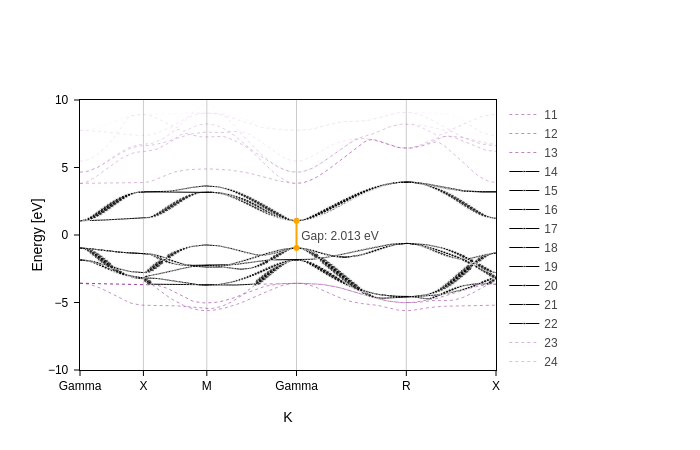

In [23]:
thumbnail_plot = bands_plot

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------